In [59]:
import cv2
import os

from glob import glob
import matplotlib.pyplot as plt

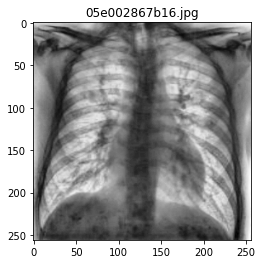

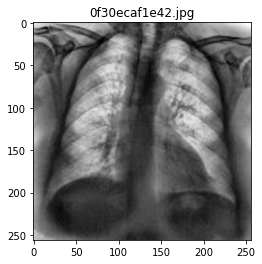

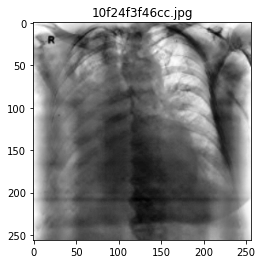

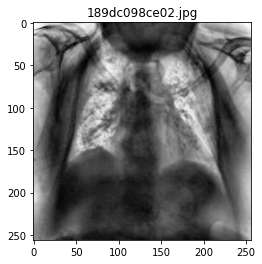

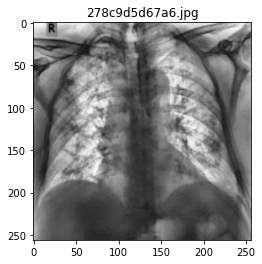

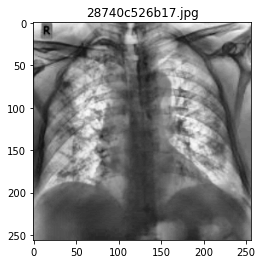

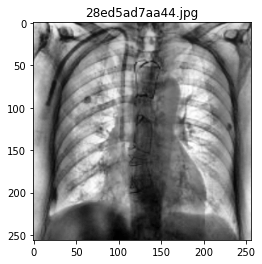

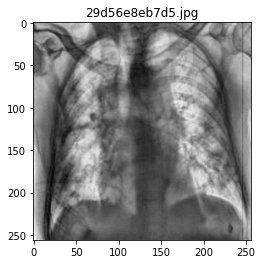

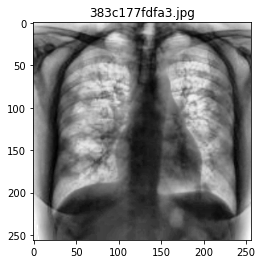

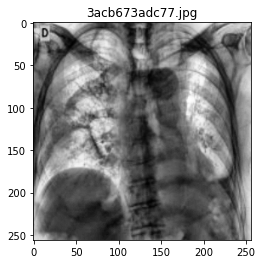

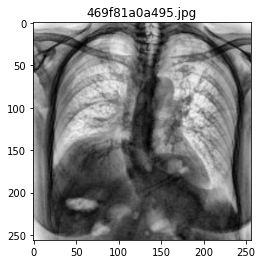

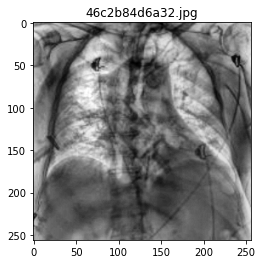

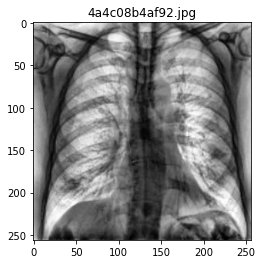

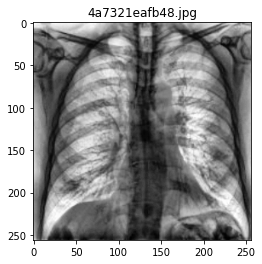

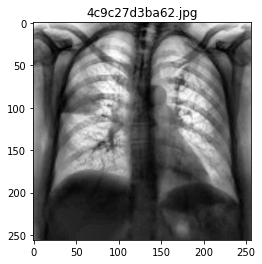

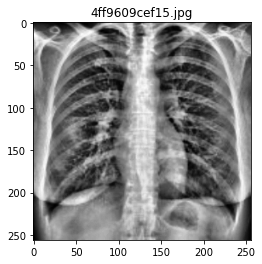

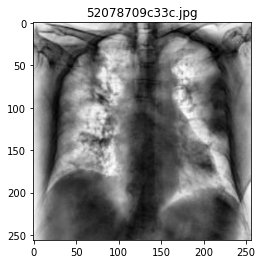

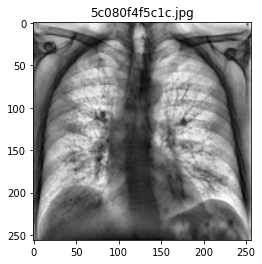

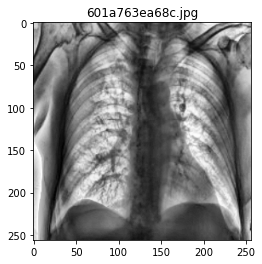

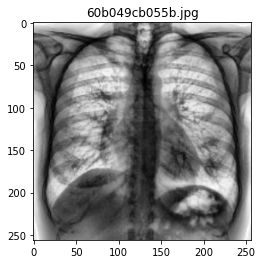

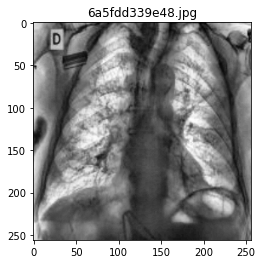

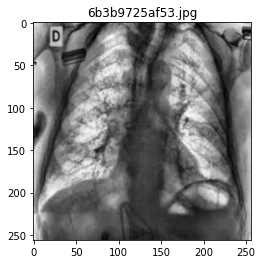

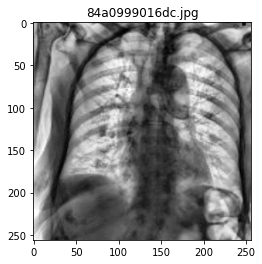

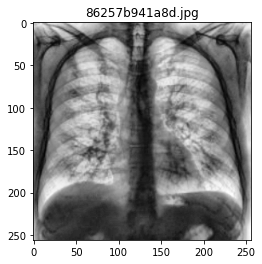

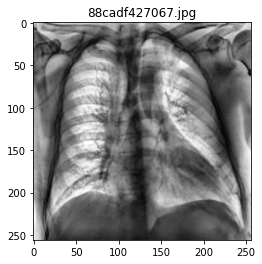

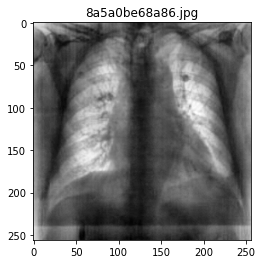

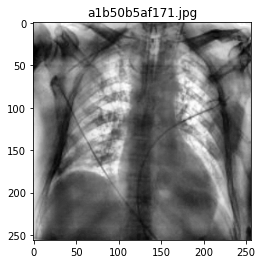

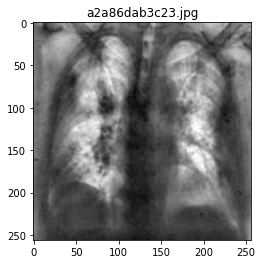

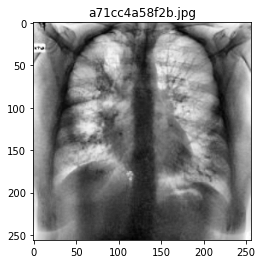

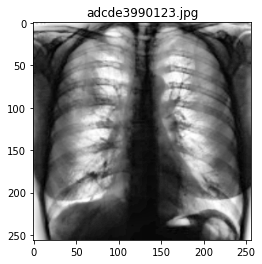

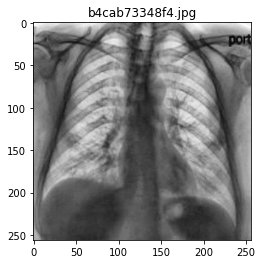

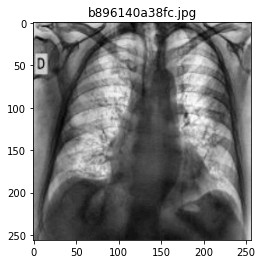

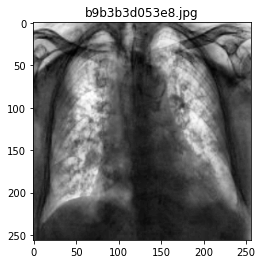

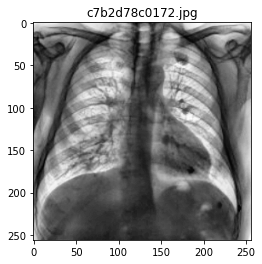

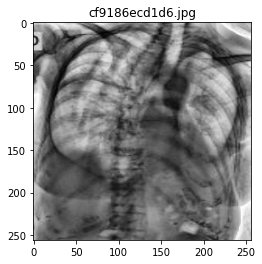

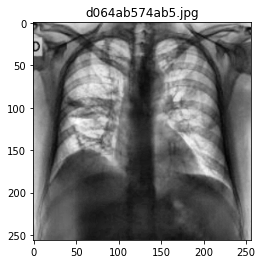

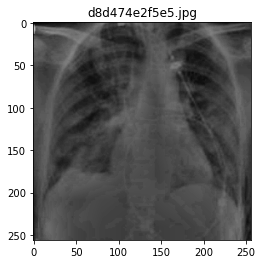

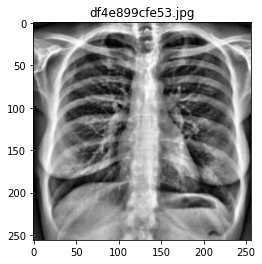

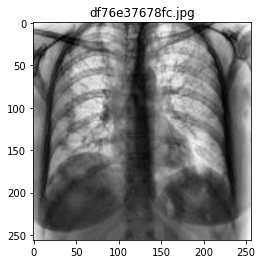

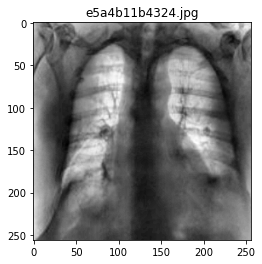

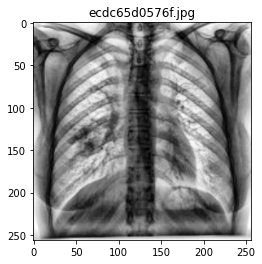

In [94]:
with open('img/valid_loc.txt', 'r') as f:
    train_loc = f.readlines() 

for loc in train_loc:
    loc = loc.split(",")
    jpgname = loc[0]
    x1 = int(loc[1])
    y1 = int(loc[2])
    x2 = int(loc[3])
    y2 = int(loc[4])
    
    path = 'img/valid/{}'.format(jpgname)
    img_array = plt.imread(path)
    img_cut = img_array[y1:y2, x1:x2]           # cut
    img_cut = cv2.resize(img_cut, (256,256))    # same size
    
    
    
    # 增強對比 
    # create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_cut)
    
    # 偵測黑色
    if detect_black(img_clahe):
        plt.imshow(img_clahe, cmap="gray")
        plt.title(jpgname)
        plt.show()
        
        cv2.imwrite('img/valid_cut/{}'.format(jpgname), 255-img_cut)
        

In [88]:
def detect_black(img):
    black_pixel = (img<128).sum()
    all_pixel = img.shape[0]*img.shape[1]
    black_percent = black_pixel/all_pixel
    if black_percent>=0.5:
        return True
    else:
        return False